<div align="center">

<img src="UoG.png" alt="uog" width="200"/>

# University of Gondar  
## College of Informatics  
## Department of Information Science  
## MSc in Data Science and Analytics  
### SOCIAL NETWORK ANALYTICS
### Amharic Music Video Sentiment Analysis

#### Eyob Birhanu & Felegeselam Mesfin
#### JULY, 2025  

</div>

### STEP 1 - Video comment Dataset loading 

In [1]:
import re
import pandas as pd

# --- Phase 1: Data Acquisition and Initial Cleaning ---

# Step 1: Load Comments from Excel File
excel_file_path = 'amharic_youtube_comments_UwOzBq8snm8.xlsx'
try:
    df = pd.read_excel(excel_file_path)
    # Assuming the comments are in a column named 'Comment Text'
    if 'Comment Text' not in df.columns:
        raise ValueError("The Excel file must contain a column named 'Comment Text'.")
    amharic_comments = df['Comment Text'].astype(str).tolist()
    print(f"Successfully loaded {len(amharic_comments)} comments from '{excel_file_path}'.")
except FileNotFoundError:
    print(f"Error: The file '{excel_file_path}' was not found.")
    amharic_comments = []
except ValueError as e:
    print(f"Error: {e}")
    amharic_comments = []

if not amharic_comments:
    exit()


Successfully loaded 2867 comments from 'amharic_youtube_comments_UwOzBq8snm8.xlsx'.


### STEP 2 - Pre-processing

In [3]:
# Remove Irrelevant Information
def remove_usernames(text):
    return re.sub(r'@\w+', '', text)

def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

cleaned_comments_initial = [remove_usernames(remove_urls(comment)).strip() for comment in amharic_comments]
print("After removing usernames and URLs (first 10 examples):", cleaned_comments_initial[:10])


After removing usernames and URLs (first 10 examples): ['ከልብ አመሰግናለሁ 🙏 አስር ሚሊየን እይታ አግኝተናል ይሄደግሞ የሆነው በእናንተ ነው ደሞቸ ክበሩልኝ 🙏🙏  ድል ለአማራ ፋኖ 💪', 'ጀግናችን በጣም ምርጥ ስራ ነው እናመሰግናለን ❤❤🙏🙏\n12M view 😍❤❤❤', 'ኡፍፍፍፍፍፍ የወኔ ነዳጅ የሆነ ታሪካዊ ሙዚቃ።💪💪💪💪💪💪', 'ትክክለኛና በሰዉ ልጅ አምሮ ያለ እዉነት ነዉ ። በተለይ በዚህ ወቅት ለአማራ ህዝብ መገለጫዉ ነዉ ።ጊዜ ሰቶን በየስፍራዉ የሚደመጥበት ጊዜ ይመጣል። እስከዛዉ ሰላም ያኑረን!!!', 'ትክክለኛና በሰዉ ልጅ አምሮ ያለ እዉነት ነዉ ። በተለይ በዚህ ወቅት ለአማራ ህዝብ መገለጫዉ ነዉ ።ጊዜ ሰቶን በየስፍራዉ የሚደመጥበት ጊዜ ይመጣል። እስከዛዉ ሰላም ያኑረን!!!', 'ትክክለኛና በሰዉ ልጅ አምሮ ያለ እዉነት ነዉ ። በተለይ በዚህ ወቅት ለአማራ ህዝብ መገለጫዉ ነዉ ።ጊዜ ሰቶን በየስፍራዉ የሚደመጥበት ጊዜ ይመጣል። እስከዛዉ ሰላም ያኑረን!!!', 'እኔ ስልጤ ነኝ ግን ድል ለአማራራራራራራራ 📢', 'የኔኔኔኔኔኔኔኔኔ❤❤❤❤❤ ውድድድድድ ጀግናየየየየየየ ዳኝየ   የኢትዮጵያ   ውድ ልጇ  የኔ  ወንድምምምምም!!!!!', 'የኔ ጀግና', 'ጀግናዬ   ክበርልኝ ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤']


In [4]:
# Handle Emojis and Symbols
def remove_emojis_symbols(text):
    # This regex tries to remove a wide range of unicode characters that are not letters, numbers, or common punctuation in Amharic
    return re.sub(r'[^\u0020-\u007E\u07F0-\u07FA\u0800-\u083E\u1200-\u137F\u1380-\u1399\u2D80-\u2DDE\uAB00-\uAB2E\u1C80-\u1C88\u1E00-\u1EFF\u2C60-\u2C7F\uA720-\uA7FF\uAB30-\uAB64\uFB00-\uFB4F\uFE20-\uFE2F\uFF00-\uFFEF]+', '', text)

cleaned_comments_emojis = [remove_emojis_symbols(comment) for comment in cleaned_comments_initial]
print("After removing emojis and symbols (first 5 examples):", cleaned_comments_emojis[:10])

After removing emojis and symbols (first 5 examples): ['ከልብ አመሰግናለሁ  አስር ሚሊየን እይታ አግኝተናል ይሄደግሞ የሆነው በእናንተ ነው ደሞቸ ክበሩልኝ   ድል ለአማራ ፋኖ ', 'ጀግናችን በጣም ምርጥ ስራ ነው እናመሰግናለን 12M view ', 'ኡፍፍፍፍፍፍ የወኔ ነዳጅ የሆነ ታሪካዊ ሙዚቃ።', 'ትክክለኛና በሰዉ ልጅ አምሮ ያለ እዉነት ነዉ ። በተለይ በዚህ ወቅት ለአማራ ህዝብ መገለጫዉ ነዉ ።ጊዜ ሰቶን በየስፍራዉ የሚደመጥበት ጊዜ ይመጣል። እስከዛዉ ሰላም ያኑረን!!!', 'ትክክለኛና በሰዉ ልጅ አምሮ ያለ እዉነት ነዉ ። በተለይ በዚህ ወቅት ለአማራ ህዝብ መገለጫዉ ነዉ ።ጊዜ ሰቶን በየስፍራዉ የሚደመጥበት ጊዜ ይመጣል። እስከዛዉ ሰላም ያኑረን!!!', 'ትክክለኛና በሰዉ ልጅ አምሮ ያለ እዉነት ነዉ ። በተለይ በዚህ ወቅት ለአማራ ህዝብ መገለጫዉ ነዉ ።ጊዜ ሰቶን በየስፍራዉ የሚደመጥበት ጊዜ ይመጣል። እስከዛዉ ሰላም ያኑረን!!!', 'እኔ ስልጤ ነኝ ግን ድል ለአማራራራራራራራ ', 'የኔኔኔኔኔኔኔኔኔ ውድድድድድ ጀግናየየየየየየ ዳኝየ   የኢትዮጵያ   ውድ ልጇ  የኔ  ወንድምምምምም!!!!!', 'የኔ ጀግና', 'ጀግናዬ   ክበርልኝ ']


In [5]:
# Normalize Amharic Script Variations (Placeholder)
def normalize_amharic(text):
    # Implement your Amharic normalization rules here if needed
    return text

normalized_comments = [normalize_amharic(comment) for comment in cleaned_comments_emojis]
print("After normalization (first 5 examples):", normalized_comments[:10])

After normalization (first 5 examples): ['ከልብ አመሰግናለሁ  አስር ሚሊየን እይታ አግኝተናል ይሄደግሞ የሆነው በእናንተ ነው ደሞቸ ክበሩልኝ   ድል ለአማራ ፋኖ ', 'ጀግናችን በጣም ምርጥ ስራ ነው እናመሰግናለን 12M view ', 'ኡፍፍፍፍፍፍ የወኔ ነዳጅ የሆነ ታሪካዊ ሙዚቃ።', 'ትክክለኛና በሰዉ ልጅ አምሮ ያለ እዉነት ነዉ ። በተለይ በዚህ ወቅት ለአማራ ህዝብ መገለጫዉ ነዉ ።ጊዜ ሰቶን በየስፍራዉ የሚደመጥበት ጊዜ ይመጣል። እስከዛዉ ሰላም ያኑረን!!!', 'ትክክለኛና በሰዉ ልጅ አምሮ ያለ እዉነት ነዉ ። በተለይ በዚህ ወቅት ለአማራ ህዝብ መገለጫዉ ነዉ ።ጊዜ ሰቶን በየስፍራዉ የሚደመጥበት ጊዜ ይመጣል። እስከዛዉ ሰላም ያኑረን!!!', 'ትክክለኛና በሰዉ ልጅ አምሮ ያለ እዉነት ነዉ ። በተለይ በዚህ ወቅት ለአማራ ህዝብ መገለጫዉ ነዉ ።ጊዜ ሰቶን በየስፍራዉ የሚደመጥበት ጊዜ ይመጣል። እስከዛዉ ሰላም ያኑረን!!!', 'እኔ ስልጤ ነኝ ግን ድል ለአማራራራራራራራ ', 'የኔኔኔኔኔኔኔኔኔ ውድድድድድ ጀግናየየየየየየ ዳኝየ   የኢትዮጵያ   ውድ ልጇ  የኔ  ወንድምምምምም!!!!!', 'የኔ ጀግና', 'ጀግናዬ   ክበርልኝ ']


In [6]:
# remove punctuation and number

def remove_punctuation(text):
    # Remove common punctuation marks
    return re.sub(r'[^\w\s]', '', text)  # \w matches word characters (letters, digits, underscore); \s matches whitespace

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Apply cleaning
cleaned_comments_punct_num = [
    remove_punctuation(remove_numbers(comment)).strip()
    for comment in normalized_comments
]

# Print first 5 examples
print("After removing punctuation and numbers (first 5 examples):", cleaned_comments_punct_num[:50])

After removing punctuation and numbers (first 5 examples): ['ከልብ አመሰግናለሁ  አስር ሚሊየን እይታ አግኝተናል ይሄደግሞ የሆነው በእናንተ ነው ደሞቸ ክበሩልኝ   ድል ለአማራ ፋኖ', 'ጀግናችን በጣም ምርጥ ስራ ነው እናመሰግናለን M view', 'ኡፍፍፍፍፍፍ የወኔ ነዳጅ የሆነ ታሪካዊ ሙዚቃ', 'ትክክለኛና በሰዉ ልጅ አምሮ ያለ እዉነት ነዉ  በተለይ በዚህ ወቅት ለአማራ ህዝብ መገለጫዉ ነዉ ጊዜ ሰቶን በየስፍራዉ የሚደመጥበት ጊዜ ይመጣል እስከዛዉ ሰላም ያኑረን', 'ትክክለኛና በሰዉ ልጅ አምሮ ያለ እዉነት ነዉ  በተለይ በዚህ ወቅት ለአማራ ህዝብ መገለጫዉ ነዉ ጊዜ ሰቶን በየስፍራዉ የሚደመጥበት ጊዜ ይመጣል እስከዛዉ ሰላም ያኑረን', 'ትክክለኛና በሰዉ ልጅ አምሮ ያለ እዉነት ነዉ  በተለይ በዚህ ወቅት ለአማራ ህዝብ መገለጫዉ ነዉ ጊዜ ሰቶን በየስፍራዉ የሚደመጥበት ጊዜ ይመጣል እስከዛዉ ሰላም ያኑረን', 'እኔ ስልጤ ነኝ ግን ድል ለአማራራራራራራራ', 'የኔኔኔኔኔኔኔኔኔ ውድድድድድ ጀግናየየየየየየ ዳኝየ   የኢትዮጵያ   ውድ ልጇ  የኔ  ወንድምምምምም', 'የኔ ጀግና', 'ጀግናዬ   ክበርልኝ', 'አማራ አማራ አማራ ፍኖ ያሸንፍን', 'ዋው', 'አንዴ ደስ ይለኛል አንዴ ይከፋኛል ይሄን ሙዚቃ  ስሰማው  አልቅስ ሁሉ ይለኛል የማደርገው  ሳጣ', 'አይይይይይይይይይይይ ወኒ የሚቀሰቅስ ዳኘ ዋለ የምርም ካንጀትህ አማሃራ ነህ', 'ፋኖ', 'ዲል ለፋኖ', 'ዳኘ ዉስጤ ነህ አባይ አፋፉ ላይ የተኛዉን በሬ ቀስቅሰዉ ቀስቅሰዉ', 'አማራፋኖ', 'እሬሽን የሆነ ዘፈን ስለዘፈንክልን አመስግነናል', 'ያማራዉ ኩራት ኦኔ ቀስቃሽ የዳኜ ወዳጆች የት ናችሁ አትታዩኝም እስኪ ባንድነት ወሎ ጎጃም ጎንደር ሸዋ አን አምራ በሉ ሰብሰብ ብላችሁ', 'ዳኘ ማ

In [7]:
# Tokenization (Basic space-based)
def tokenize_amharic(normalized_comments):
    return normalized_comments.split()

tokenized_comments = [tokenize_amharic(comment) for comment in cleaned_comments_punct_num]
print("Tokenized Comments (first comment example):", tokenized_comments[0] if tokenized_comments else [])

Tokenized Comments (first comment example): ['ከልብ', 'አመሰግናለሁ', 'አስር', 'ሚሊየን', 'እይታ', 'አግኝተናል', 'ይሄደግሞ', 'የሆነው', 'በእናንተ', 'ነው', 'ደሞቸ', 'ክበሩልኝ', 'ድል', 'ለአማራ', 'ፋኖ']


In [8]:
# Amharic Stop Word
amharic_stopwords = set([
    # Common verbs and auxiliaries
    "ነው", "ነዉ", "ናት", "ነበሩ", "ነበር", "ነበረ", "አለ", "አለች", "አላቸው", "አልነበረም", "አይደለም",
    "አል", "እንዲህ", "ነበርኩ", "ነበርን", "ነኝ", "ነን", "ነዎት",

    # Conjunctions
    "እና", "ወይም", "ግን", "ነገር", "ነገርግን", "ስለዚህ", "ስለዚያ", "ምክንያቱም", "ቢሆንም", "እስካሁን",

    # Prepositions
    "ከ", "በ", "ላይ", "ውስጥ", "ውጭ", "ወደ", "እስከ", "እኩል", "በኩል", "በተጨማሪ", "በሚከተለው",

    # Demonstratives and pronouns
    "ይህ", "ይቺ", "እነዚህ", "ያ", "ያቺ", "እነዚያ", "እኔ", "አንተ", "አንቺ", "እሱ", "እሷ", "እኛ", "እናንተ", "እነሱ",
    "የኔ", "የእኔ", "የአንተ", "የእሷ", "የእሱ", "የእኛ", "የእነሱ",

    # Interrogatives
    "ምን", "ማን", "መቼ", "የት", "እንዴት", "ለምን", "ስለምን",

    # Frequency, quantifiers
    "ብቻ", "ደግሞ", "ሁሉ", "ሁሉም", "አንዳንዱ", "አንዳንድ", "ብዙ", "ጥቂት", "በጣም", "ትንሽ", "አብዛኛውን", "በየ", "ሁልጊዜ",

    # Fillers / modal
    "እንደ", "እንደዚህ", "እንደዚያ", "እንጂ", "እንኳን", "እንኳንም", "እንኳ", "እንደሆነ", "እንዲሁ", "እንደምንም",

    # Misc
    "ያማ", "ወዲያ", "በዚህ", "የዚህ", "በዚያ", "የዚያ", "እዚህ", "እዚያ", "ማለት", "ማለትም", "እስካሁን", "አሁን",
    "የ", "እናም", "ከዚያ", "ደስ", "ይበላ", "እንሁን", "ሆኖ", "እንዳይኖረው", "በ" , "ከ"
])

def remove_stopwords(tokens):
    return [token for token in tokens if token not in amharic_stopwords]

filtered_comments = [remove_stopwords(tokens) for tokens in tokenized_comments]
print("After stop word removal (first comment example):", filtered_comments[0] if filtered_comments else [])

After stop word removal (first comment example): ['ከልብ', 'አመሰግናለሁ', 'አስር', 'ሚሊየን', 'እይታ', 'አግኝተናል', 'ይሄደግሞ', 'የሆነው', 'በእናንተ', 'ደሞቸ', 'ክበሩልኝ', 'ድል', 'ለአማራ', 'ፋኖ']


In [9]:
# Basic Amharic Stemmer
def basic_amharic_stemmer(word):
    suffixes_to_remove = [
        "ዎቹን", "ዎችን", "ዎች", "ውን", "ቷን", "ቱን", "ነቱ", "ነቷ", "ነቸው", "ች","አቸው"
    ]

    prefixes_to_remove = [
        "እነ", "ወደ", "እን", "እንደ", "አል", "የ", "እየ", "ከ", "በ", "ለ", "እስከ", "በየ", "ያለ"
    ]

    for prefix in sorted(prefixes_to_remove, key=len, reverse=True):
        if word.startswith(prefix):
            word = word[len(prefix):]
            break

    for suffix in sorted(suffixes_to_remove, key=len, reverse=True):
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break

    return word

# Optional: Placeholder for lemmatizer (can be improved)
def basic_amharic_lemmatizer(word):
    return word  # Placeholder

# Process: Tokenized → Stop Words Removed → Stemmed/Lemmatized
# tokenized_comments should already exist (list of list of tokens per comment)

filtered_comments = [remove_stopwords(tokens) for tokens in tokenized_comments]

lemmatized_and_stemmed_comments = [
    [basic_amharic_lemmatizer(basic_amharic_stemmer(token)) for token in tokens]
    for tokens in filtered_comments
]

print("After stemming and lemmatization (first comment example):",
      lemmatized_and_stemmed_comments[0] if lemmatized_and_stemmed_comments else [])

After stemming and lemmatization (first comment example): ['ልብ', 'አመሰግናለሁ', 'አስር', 'ሚሊየን', 'እይታ', 'አግኝተናል', 'ይሄደግሞ', 'ሆነው', 'እናንተ', 'ደሞቸ', 'ክበሩልኝ', 'ድል', 'አማራ', 'ፋኖ']


In [10]:
vlemmatized_and_stemmed_comments

[['ልብ',
  'አመሰግናለሁ',
  'አስር',
  'ሚሊየን',
  'እይታ',
  'አግኝተናል',
  'ይሄደግሞ',
  'ሆነው',
  'እናንተ',
  'ደሞቸ',
  'ክበሩልኝ',
  'ድል',
  'አማራ',
  'ፋኖ'],
 ['ጀግናችን', 'ምርጥ', 'ስራ', 'እናመሰግናለን', 'M', 'view'],
 ['ኡፍፍፍፍፍፍ', 'ወኔ', 'ነዳጅ', 'ሆነ', 'ታሪካዊ', 'ሙዚቃ'],
 ['ትክክለኛና',
  'ሰዉ',
  'ልጅ',
  'አምሮ',
  '',
  'እዉነት',
  'ተለይ',
  'ወቅት',
  'አማራ',
  'ህዝብ',
  'መገለጫዉ',
  'ጊዜ',
  'ሰቶን',
  'ስፍራዉ',
  'ሚደመጥበት',
  'ጊዜ',
  'ይመጣል',
  'ዛዉ',
  'ሰላም',
  'ያኑረን'],
 ['ትክክለኛና',
  'ሰዉ',
  'ልጅ',
  'አምሮ',
  '',
  'እዉነት',
  'ተለይ',
  'ወቅት',
  'አማራ',
  'ህዝብ',
  'መገለጫዉ',
  'ጊዜ',
  'ሰቶን',
  'ስፍራዉ',
  'ሚደመጥበት',
  'ጊዜ',
  'ይመጣል',
  'ዛዉ',
  'ሰላም',
  'ያኑረን'],
 ['ትክክለኛና',
  'ሰዉ',
  'ልጅ',
  'አምሮ',
  '',
  'እዉነት',
  'ተለይ',
  'ወቅት',
  'አማራ',
  'ህዝብ',
  'መገለጫዉ',
  'ጊዜ',
  'ሰቶን',
  'ስፍራዉ',
  'ሚደመጥበት',
  'ጊዜ',
  'ይመጣል',
  'ዛዉ',
  'ሰላም',
  'ያኑረን'],
 ['ስልጤ', 'ድል', 'አማራራራራራራራ'],
 ['ኔኔኔኔኔኔኔኔኔ', 'ውድድድድድ', 'ጀግናየየየየየየ', 'ዳኝየ', 'ኢትዮጵያ', 'ውድ', 'ልጇ', 'ወንድምምምምም'],
 ['ጀግና'],
 ['ጀግናዬ', 'ክበርልኝ'],
 ['አማራ', 'አማራ', 'አማራ', 'ፍኖ', 'ያሸንፍን'],
 ['ዋው'],
 ['አንዴ',
  'ይለኛል',
  'አን

### Join tokens back into cleaned sentences

In [11]:
cleaned_texts = [" ".join(tokens) for tokens in lemmatized_and_stemmed_comments]

### STEP 3 - Feature Extraction Approaches

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
from gensim.models import Word2Vec

# 1. Bag of Words (CountVectorizer)
count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(cleaned_texts)
print("Bag of Words matrix shape:", X_bow.shape)

# 2. TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_texts)
print("TF-IDF matrix shape:", X_tfidf.shape)

# 3. Word2Vec Embeddings (gensim)
# Word2Vec expects a list of tokenized sentences
w2v_model = Word2Vec(sentences=lemmatized_and_stemmed_comments, vector_size=100, window=5, min_count=1, workers=4)

# Example: get vector for a word
word_vector = w2v_model.wv['እኔ'] if 'እኔ' in w2v_model.wv else None
print("Vector for word 'እኔ':", word_vector)

# To get sentence vectors, average word vectors of tokens in each sentence:
def sentence_vector(tokens, model, vector_size=100):
    vecs = [model.wv[token] for token in tokens if token in model.wv]
    if len(vecs) == 0:
        return [0] * vector_size
    return list(sum(vecs) / len(vecs))

X_w2v = [sentence_vector(tokens, w2v_model) for tokens in lemmatized_and_stemmed_comments]
print("Example sentence vector (first comment):", X_w2v[0])

Bag of Words matrix shape: (2867, 8233)
TF-IDF matrix shape: (2867, 8233)
Vector for word 'እኔ': [-3.0134688e-03  6.2431516e-03  1.0527254e-02  6.6269012e-03
  3.9515048e-03  4.0729553e-04 -1.7996080e-03 -5.7501686e-03
 -4.6386737e-03  2.3928024e-03 -7.9138586e-03  5.0787227e-03
 -4.3845982e-03  5.1859892e-03 -6.6296835e-03 -3.7507787e-03
 -3.4712590e-03 -3.3519652e-03  6.6840420e-03  2.1577030e-03
  4.5640515e-03 -2.0332634e-03 -4.2319186e-03 -5.3069582e-03
 -9.2691248e-03 -3.8472617e-03 -4.6669845e-03 -1.6645555e-03
 -4.6346276e-03 -7.5051938e-03  9.6527096e-03  6.1902339e-03
 -1.2086858e-04 -8.5252998e-03 -1.7342734e-03  1.0374125e-02
  9.2426324e-03  4.1270466e-04 -8.6333894e-04  6.3801357e-03
  4.0539945e-03  3.8632241e-03  2.0073343e-03  5.2971691e-03
  6.6261600e-06  2.3785671e-03 -2.3068476e-03  7.5430847e-03
  4.1031311e-03  2.0526168e-03  3.7912866e-03 -8.6295549e-03
 -8.8308696e-03  3.0045849e-03 -2.2897983e-03 -4.4789989e-03
 -1.8003230e-03  9.8887673e-03  8.4803468e-03 -7.2

### Summary:

    X_bow and X_tfidf are sparse matrices ready for ML models.

    X_w2v is a list of dense vectors representing each comment.

### BAG OF WORDS REPRESENATION

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Join tokens to form sentences again
cleaned_texts = [" ".join(tokens) for tokens in lemmatized_and_stemmed_comments]

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the cleaned texts
X_bow = count_vectorizer.fit_transform(cleaned_texts)

# Show feature names (the vocabulary)
print("Bag of Words Vocabulary (first 20 words):", list(count_vectorizer.vocabulary_.keys())[:20])

# Convert the first document vector to array and show counts
first_doc_vector = X_bow.toarray()[0]
print("First document Bag of Words vector:", first_doc_vector)

# Show feature name with counts for first document
print("First document word counts:")
for word, idx in count_vectorizer.vocabulary_.items():
    count = first_doc_vector[idx]
    if count > 0:
        print(f"{word}: {count}")

Bag of Words Vocabulary (first 20 words): ['ልብ', 'አመሰግናለሁ', 'አስር', 'ሚሊየን', 'እይታ', 'አግኝተናል', 'ይሄደግሞ', 'ሆነው', 'እናንተ', 'ደሞቸ', 'ክበሩልኝ', 'ድል', 'አማራ', 'ፋኖ', 'ጀግናችን', 'ምርጥ', 'ስራ', 'እናመሰግናለን', 'view', 'ኡፍፍፍፍፍፍ']
First document Bag of Words vector: [0 0 0 ... 0 0 0]
First document word counts:
ልብ: 1
አመሰግናለሁ: 1
አስር: 1
ሚሊየን: 1
እይታ: 1
አግኝተናል: 1
ይሄደግሞ: 1
ሆነው: 1
እናንተ: 1
ደሞቸ: 1
ክበሩልኝ: 1
ድል: 1
አማራ: 1
ፋኖ: 1


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd

# Assuming `lemmatized_and_stemmed_comments` is a list of token lists like:
# [['አበባ', 'ደስ'], ['ደህንነት', 'አስፈላጊ'], ...]

# Step 1: Join tokens into cleaned text strings
cleaned_texts = [" ".join(tokens) for tokens in lemmatized_and_stemmed_comments]

# Step 2: Create Bag of Words
count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(cleaned_texts)
vocab = count_vectorizer.get_feature_names_out()
bow_array = X_bow.toarray()

# Step 3: Summarize BoW results

# 1. Word frequency across all documents
word_frequencies = np.sum(bow_array, axis=0)
word_freq_df = pd.DataFrame({'word': vocab, 'count': word_frequencies})
top_overall = word_freq_df.sort_values(by='count', ascending=False).head(10)

print("\n🔝 Top 10 Most Frequent Words in All Comments:")
print(top_overall.to_string(index=False))

# 2. Word count summary per document
print("\n📄 Summary Per Document:")
for doc_idx, doc_vector in enumerate(bow_array):
    total_words = int(np.sum(doc_vector))
    unique_words = int(np.count_nonzero(doc_vector))
    top_indices = doc_vector.argsort()[::-1][:3]  # Top 3
    top_words = [(vocab[i], doc_vector[i]) for i in top_indices if doc_vector[i] > 0]
    
    print(f"\nDocument {doc_idx + 1}:")
    print(f"  Total words: {total_words}")
    print(f"  Unique words: {unique_words}")
    print(f"  Top words: {top_words}")



🔝 Top 10 Most Frequent Words in All Comments:
 word  count
  አማራ    959
   ፋኖ    918
   ድል    593
ኢትዮጵያ    206
  ጀግና    198
  ህዝብ    162
   ዳኘ    145
   ልጅ    142
   ዳኜ    130
  አንድ    104

📄 Summary Per Document:

Document 1:
  Total words: 14
  Unique words: 14
  Top words: [('ፋኖ', 1), ('ሚሊየን', 1), ('ድል', 1)]

Document 2:
  Total words: 5
  Unique words: 5
  Top words: [('ስራ', 1), ('ምርጥ', 1), ('view', 1)]

Document 3:
  Total words: 6
  Unique words: 6
  Top words: [('ሆነ', 1), ('ነዳጅ', 1), ('ታሪካዊ', 1)]

Document 4:
  Total words: 19
  Unique words: 18
  Top words: [('ጊዜ', 2), ('አማራ', 1), ('ይመጣል', 1)]

Document 5:
  Total words: 19
  Unique words: 18
  Top words: [('ጊዜ', 2), ('አማራ', 1), ('ይመጣል', 1)]

Document 6:
  Total words: 19
  Unique words: 18
  Top words: [('ጊዜ', 2), ('አማራ', 1), ('ይመጣል', 1)]

Document 7:
  Total words: 3
  Unique words: 3
  Top words: [('ድል', 1), ('ስልጤ', 1), ('አማራራራራራራራ', 1)]

Document 8:
  Total words: 8
  Unique words: 8
  Top words: [('ኢትዮጵያ', 1), ('ውድድድድድ', 

### TF - IDF REPRESENTATION

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

cleaned_texts = [" ".join(tokens) for tokens in lemmatized_and_stemmed_comments]

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_texts)

vocab = tfidf_vectorizer.get_feature_names_out()  # vocabulary words

# Convert sparse matrix to dense array (careful with large data)
tfidf_array = X_tfidf.toarray()

for doc_idx, doc_vector in enumerate(tfidf_array):
    print(f"\nDocument {doc_idx + 1} TF-IDF scores:")
    for word_idx, score in enumerate(doc_vector):
        if score > 0:
            print(f"  {vocab[word_idx]}: {score:.4f}")



Document 1 TF-IDF scores:
  ሆነው: 0.2979
  ልብ: 0.2522
  ሚሊየን: 0.2598
  አመሰግናለሁ: 0.2915
  አማራ: 0.1046
  አስር: 0.3054
  አግኝተናል: 0.3267
  እናንተ: 0.2915
  እይታ: 0.2859
  ክበሩልኝ: 0.3147
  ይሄደግሞ: 0.3267
  ደሞቸ: 0.2915
  ድል: 0.1240
  ፋኖ: 0.1075

Document 2 TF-IDF scores:
  view: 0.5242
  ምርጥ: 0.4186
  ስራ: 0.3979
  እናመሰግናለን: 0.4583
  ጀግናችን: 0.4261

Document 3 TF-IDF scores:
  ሆነ: 0.3177
  ሙዚቃ: 0.2766
  ታሪካዊ: 0.4457
  ነዳጅ: 0.5139
  ኡፍፍፍፍፍፍ: 0.4887
  ወኔ: 0.3477

Document 4 TF-IDF scores:
  ህዝብ: 0.1365
  ልጅ: 0.1367
  መገለጫዉ: 0.2539
  ሚደመጥበት: 0.2539
  ሰላም: 0.1968
  ሰቶን: 0.2539
  ሰዉ: 0.2232
  ስፍራዉ: 0.2539
  ተለይ: 0.2352
  ትክክለኛና: 0.2539
  አማራ: 0.0844
  አምሮ: 0.2539
  እዉነት: 0.2268
  ወቅት: 0.2539
  ዛዉ: 0.2539
  ያኑረን: 0.2539
  ይመጣል: 0.2232
  ጊዜ: 0.3606

Document 5 TF-IDF scores:
  ህዝብ: 0.1365
  ልጅ: 0.1367
  መገለጫዉ: 0.2539
  ሚደመጥበት: 0.2539
  ሰላም: 0.1968
  ሰቶን: 0.2539
  ሰዉ: 0.2232
  ስፍራዉ: 0.2539
  ተለይ: 0.2352
  ትክክለኛና: 0.2539
  አማራ: 0.0844
  አምሮ: 0.2539
  እዉነት: 0.2268
  ወቅት: 0.2539
  ዛዉ: 0.2539
  ያኑረን: 0.2539
  ይ

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

cleaned_texts = [" ".join(tokens) for tokens in lemmatized_and_stemmed_comments]

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_texts)

vocab = tfidf_vectorizer.get_feature_names_out()  # all words in vocabulary

top_n = 5  # Number of top words you want per document

tfidf_array = X_tfidf.toarray()

for doc_idx, doc_vector in enumerate(tfidf_array):
    print(f"\nTop {top_n} TF-IDF words in Document {doc_idx + 1}:")
    # Get indices of words sorted by TF-IDF score descending
    sorted_indices = np.argsort(doc_vector)[::-1]
    top_indices = sorted_indices[:top_n]
    
    for idx in top_indices:
        if doc_vector[idx] > 0:
            print(f"  {vocab[idx]}: {doc_vector[idx]:.4f}")



Top 5 TF-IDF words in Document 1:
  ይሄደግሞ: 0.3267
  አግኝተናል: 0.3267
  ክበሩልኝ: 0.3147
  አስር: 0.3054
  ሆነው: 0.2979

Top 5 TF-IDF words in Document 2:
  view: 0.5242
  እናመሰግናለን: 0.4583
  ጀግናችን: 0.4261
  ምርጥ: 0.4186
  ስራ: 0.3979

Top 5 TF-IDF words in Document 3:
  ነዳጅ: 0.5139
  ኡፍፍፍፍፍፍ: 0.4887
  ታሪካዊ: 0.4457
  ወኔ: 0.3477
  ሆነ: 0.3177

Top 5 TF-IDF words in Document 4:
  ጊዜ: 0.3606
  ሚደመጥበት: 0.2539
  ወቅት: 0.2539
  ሰቶን: 0.2539
  ዛዉ: 0.2539

Top 5 TF-IDF words in Document 5:
  ጊዜ: 0.3606
  ሚደመጥበት: 0.2539
  ወቅት: 0.2539
  ሰቶን: 0.2539
  ዛዉ: 0.2539

Top 5 TF-IDF words in Document 6:
  ጊዜ: 0.3606
  ሚደመጥበት: 0.2539
  ወቅት: 0.2539
  ሰቶን: 0.2539
  ዛዉ: 0.2539

Top 5 TF-IDF words in Document 7:
  አማራራራራራራራ: 0.7215
  ስልጤ: 0.6415
  ድል: 0.2605

Top 5 TF-IDF words in Document 8:
  ልጇ: 0.4007
  ኔኔኔኔኔኔኔኔኔ: 0.4007
  ጀግናየየየየየየ: 0.4007
  ወንድምምምምም: 0.4007
  ውድድድድድ: 0.3811

Top 5 TF-IDF words in Document 9:
  ጀግና: 1.0000

Top 5 TF-IDF words in Document 10:
  ክበርልኝ: 0.7212
  ጀግናዬ: 0.6928

Top 5 TF-IDF words in Docum

In [36]:
import numpy as np
import pandas as pd

# === 1. Top words across all documents ===
# Sum TF-IDF scores for each word across all documents
word_scores = np.sum(tfidf_array, axis=0)
word_score_df = pd.DataFrame({'word': vocab, 'tfidf_score': word_scores})
top_tfidf_words = word_score_df.sort_values(by='tfidf_score', ascending=False).head(10)

print("\n🔝 Top 10 Important Words (Overall TF-IDF Scores):")
print(top_tfidf_words.to_string(index=False))

# === 2. Per-document summary ===
print("\n📄 Summary Per Document:")
for doc_idx, doc_vector in enumerate(tfidf_array):
    non_zero_indices = np.nonzero(doc_vector)[0]
    non_zero_words = len(non_zero_indices)
    
    # Get top 3 TF-IDF scores in this document
    top_indices = doc_vector.argsort()[::-1][:3]
    top_words = [(vocab[i], doc_vector[i]) for i in top_indices if doc_vector[i] > 0]
    
    print(f"\nDocument {doc_idx + 1}:")
    print(f"  Words with TF-IDF > 0: {non_zero_words}")
    print(f"  Top words: {[f'{w}: {s:.4f}' for w, s in top_words]}")



🔝 Top 10 Important Words (Overall TF-IDF Scores):
 word  tfidf_score
   ፋኖ   192.584324
  አማራ   142.276779
   ድል   134.789306
  ጀግና    70.169175
   ዳኘ    38.315847
   ዳኜ    36.316382
ኢትዮጵያ    34.282183
  ህዝብ    32.585757
   ልጅ    31.345122
   ፍኖ    28.801119

📄 Summary Per Document:

Document 1:
  Words with TF-IDF > 0: 14
  Top words: ['ይሄደግሞ: 0.3267', 'አግኝተናል: 0.3267', 'ክበሩልኝ: 0.3147']

Document 2:
  Words with TF-IDF > 0: 5
  Top words: ['view: 0.5242', 'እናመሰግናለን: 0.4583', 'ጀግናችን: 0.4261']

Document 3:
  Words with TF-IDF > 0: 6
  Top words: ['ነዳጅ: 0.5139', 'ኡፍፍፍፍፍፍ: 0.4887', 'ታሪካዊ: 0.4457']

Document 4:
  Words with TF-IDF > 0: 18
  Top words: ['ጊዜ: 0.3606', 'ሚደመጥበት: 0.2539', 'ወቅት: 0.2539']

Document 5:
  Words with TF-IDF > 0: 18
  Top words: ['ጊዜ: 0.3606', 'ሚደመጥበት: 0.2539', 'ወቅት: 0.2539']

Document 6:
  Words with TF-IDF > 0: 18
  Top words: ['ጊዜ: 0.3606', 'ሚደመጥበት: 0.2539', 'ወቅት: 0.2539']

Document 7:
  Words with TF-IDF > 0: 3
  Top words: ['አማራራራራራራራ: 0.7215', 'ስልጤ: 0.6415', '

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cleaned_texts = [" ".join(tokens) for tokens in lemmatized_and_stemmed_comments]

count_vectorizer = CountVectorizer()
X_bow = count_vectorizer.fit_transform(cleaned_texts)

vocab = count_vectorizer.get_feature_names_out()  # vocabulary words

# Convert sparse matrix to dense array
bow_array = X_bow.toarray()

for doc_idx, doc_vector in enumerate(bow_array):
    print(f"\nDocument {doc_idx + 1} word counts:")
    for word_idx, count in enumerate(doc_vector):
        if count > 0:
            print(f"  {vocab[word_idx]}: {count}")



Document 1 word counts:
  ሆነው: 1
  ልብ: 1
  ሚሊየን: 1
  አመሰግናለሁ: 1
  አማራ: 1
  አስር: 1
  አግኝተናል: 1
  እናንተ: 1
  እይታ: 1
  ክበሩልኝ: 1
  ይሄደግሞ: 1
  ደሞቸ: 1
  ድል: 1
  ፋኖ: 1

Document 2 word counts:
  view: 1
  ምርጥ: 1
  ስራ: 1
  እናመሰግናለን: 1
  ጀግናችን: 1

Document 3 word counts:
  ሆነ: 1
  ሙዚቃ: 1
  ታሪካዊ: 1
  ነዳጅ: 1
  ኡፍፍፍፍፍፍ: 1
  ወኔ: 1

Document 4 word counts:
  ህዝብ: 1
  ልጅ: 1
  መገለጫዉ: 1
  ሚደመጥበት: 1
  ሰላም: 1
  ሰቶን: 1
  ሰዉ: 1
  ስፍራዉ: 1
  ተለይ: 1
  ትክክለኛና: 1
  አማራ: 1
  አምሮ: 1
  እዉነት: 1
  ወቅት: 1
  ዛዉ: 1
  ያኑረን: 1
  ይመጣል: 1
  ጊዜ: 2

Document 5 word counts:
  ህዝብ: 1
  ልጅ: 1
  መገለጫዉ: 1
  ሚደመጥበት: 1
  ሰላም: 1
  ሰቶን: 1
  ሰዉ: 1
  ስፍራዉ: 1
  ተለይ: 1
  ትክክለኛና: 1
  አማራ: 1
  አምሮ: 1
  እዉነት: 1
  ወቅት: 1
  ዛዉ: 1
  ያኑረን: 1
  ይመጣል: 1
  ጊዜ: 2

Document 6 word counts:
  ህዝብ: 1
  ልጅ: 1
  መገለጫዉ: 1
  ሚደመጥበት: 1
  ሰላም: 1
  ሰቶን: 1
  ሰዉ: 1
  ስፍራዉ: 1
  ተለይ: 1
  ትክክለኛና: 1
  አማራ: 1
  አምሮ: 1
  እዉነት: 1
  ወቅት: 1
  ዛዉ: 1
  ያኑረን: 1
  ይመጣል: 1
  ጊዜ: 2

Document 7 word counts:
  ስልጤ: 1
  አማራራራራራራራ: 1
  ድል: 1

Document 8 word counts:
  ልጇ: 1
  ኔኔኔ

In [42]:
import numpy as np
import pandas as pd

# Total number of documents
num_docs = len(bow_array)

# === 1. Word frequency across all documents ===
word_frequencies = np.sum(bow_array, axis=0)
word_freq_df = pd.DataFrame({'word': vocab, 'count': word_frequencies})
top_overall = word_freq_df.sort_values(by='count', ascending=False).head(10)

print("\n🔝 Top 10 Most Frequent Words in All Comments:")
print(top_overall.to_string(index=False))

# === 2. Word count summary per document ===
print("\n📄 Summary Per Document:")
for doc_idx, doc_vector in enumerate(bow_array):
    total_words = int(np.sum(doc_vector))
    unique_words = int(np.count_nonzero(doc_vector))
    top_indices = doc_vector.argsort()[::-1][:3]
    top_words = [(vocab[i], doc_vector[i]) for i in top_indices if doc_vector[i] > 0]
    
    print(f"\nDocument {doc_idx + 1}:")
    print(f"  Total words: {total_words}")
    print(f"  Unique words: {unique_words}")
    print(f"  Top words: {top_words}")



🔝 Top 10 Most Frequent Words in All Comments:
 word  count
  አማራ    959
   ፋኖ    918
   ድል    593
ኢትዮጵያ    206
  ጀግና    198
  ህዝብ    162
   ዳኘ    145
   ልጅ    142
   ዳኜ    130
  አንድ    104

📄 Summary Per Document:

Document 1:
  Total words: 14
  Unique words: 14
  Top words: [('ፋኖ', 1), ('ሚሊየን', 1), ('ድል', 1)]

Document 2:
  Total words: 5
  Unique words: 5
  Top words: [('ስራ', 1), ('ምርጥ', 1), ('view', 1)]

Document 3:
  Total words: 6
  Unique words: 6
  Top words: [('ሆነ', 1), ('ነዳጅ', 1), ('ታሪካዊ', 1)]

Document 4:
  Total words: 19
  Unique words: 18
  Top words: [('ጊዜ', 2), ('አማራ', 1), ('ይመጣል', 1)]

Document 5:
  Total words: 19
  Unique words: 18
  Top words: [('ጊዜ', 2), ('አማራ', 1), ('ይመጣል', 1)]

Document 6:
  Total words: 19
  Unique words: 18
  Top words: [('ጊዜ', 2), ('አማራ', 1), ('ይመጣል', 1)]

Document 7:
  Total words: 3
  Unique words: 3
  Top words: [('ድል', 1), ('ስልጤ', 1), ('አማራራራራራራራ', 1)]

Document 8:
  Total words: 8
  Unique words: 8
  Top words: [('ኢትዮጵያ', 1), ('ውድድድድድ', 

# model

In [44]:
# Combine the processed tokens back into sentences
processed_comments = [' '.join(tokens) for tokens in lemmatized_and_stemmed_comments]

# Create a DataFrame for analysis
analysis_df = pd.DataFrame({
    'Original_Comment': amharic_comments,
    'Processed_Comment': processed_comments,
    'Tokens': lemmatized_and_stemmed_comments
})

### Sentiment Analysis Approaches
Lexicon-Based Approach (Recommended for Amharic)

In [47]:
# Create or load an Amharic sentiment lexicon
# This would be a dictionary of Amharic words with their sentiment scores
# Example structure: {'መልካም': 1, 'መጥፎ': -1, 'ደስታ': 1, ...}

amharic_lexicon = {
    'አመሰግናለሁ': 1,    # positive (I thank)
    'ደስታ': 1,         # positive (happy)
    'መልካም': 1,       # positive (good)
    'ጥሩ': 1,          # positive (great)
    'ድል': 1,          # positive (victory)
    'ጀግና': 1,         # positive (hero)
    'ኩራት': 1,         # positive (pride)
    'መጥፎ': -1,        # negative (bad)
    'ክፉ': -1,         # negative (evil)
    'ስቃይ': -1,       # negative (suffering)
    'ጠላት': -1,       # negative (enemy)
    'መከራ': -1        # negative (suffering)
}

def lexicon_based_sentiment(tokens):
    sentiment_score = 0
    for token in tokens:
        if token in amharic_lexicon:
            sentiment_score += amharic_lexicon[token]
    return 'positive' if sentiment_score > 0 else 'negative' if sentiment_score < 0 else 'neutral'

analysis_df['Sentiment'] = analysis_df['Tokens'].apply(lexicon_based_sentiment)

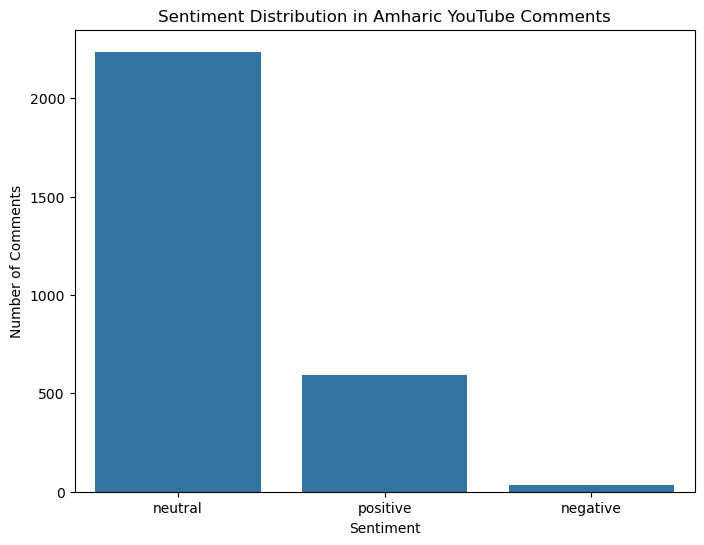

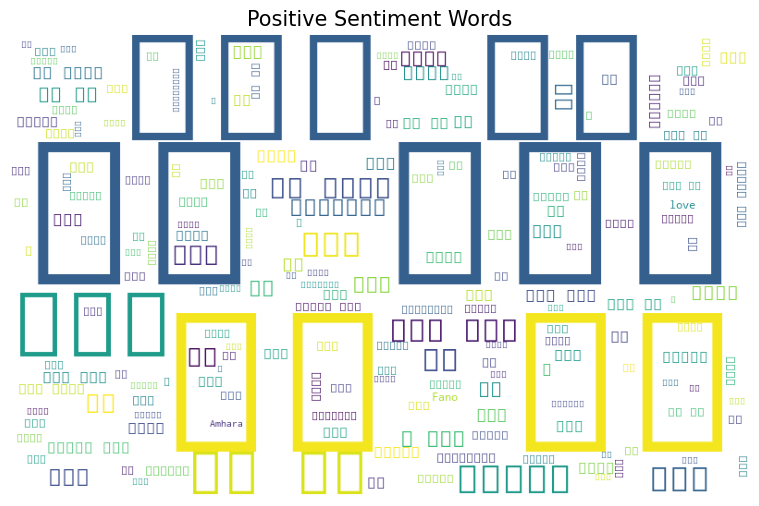

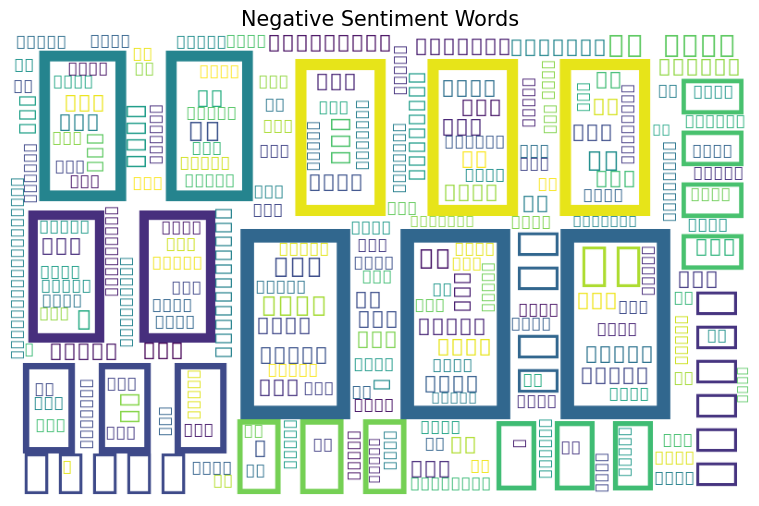

In [49]:
# Sentiment distribution
sentiment_counts = analysis_df['Sentiment'].value_counts()

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution in Amharic YouTube Comments')
plt.ylabel('Number of Comments')
plt.xlabel('Sentiment')
plt.show()

# Word clouds for each sentiment
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=500, 
                         background_color='white').generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud)
    plt.title(title, size=15)
    plt.axis("off")
    plt.show()

# Positive comments
pos_comments = ' '.join(analysis_df[analysis_df['Sentiment']=='positive']['Processed_Comment'])
generate_wordcloud(pos_comments, 'Positive Sentiment Words')

# Negative comments
neg_comments = ' '.join(analysis_df[analysis_df['Sentiment']=='negative']['Processed_Comment'])
generate_wordcloud(neg_comments, 'Negative Sentiment Words')

## Saving Outputs

In [52]:
# Save the analyzed data
analysis_df.to_csv('amharic_comments_sentiment_analysis.csv', index=False)

# Save sentiment counts
sentiment_counts.to_csv('sentiment_distribution.csv')

### NB:
1. After the sentimet analysis we must see how exactly every comment is classified as positive, neurtral or negative manually to see the efficiency of our work, as ambuigity in classification is a serious challenge in NLP specially in amharic language as NLP corpus dataset in largely isufficient and modules needed to be eveloped.
2. The video comment we used was selected because of it's large amount of comments in it, there is no any political interest in it.

## Thank you!!!